Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


Reading the dataset

In [2]:
dataframe = pd.read_csv(r"C:\Users\KIIT\Downloads\CAR DETAILS FROM CAR DEKHO.csv")
dataframe.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
dataframe.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
dataframe.isnull()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False
4338,False,False,False,False,False,False,False,False


In [6]:
dataframe.shape

(4340, 8)

In [7]:
dataframe.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
print(dataframe.fuel.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64


In [9]:
print(dataframe.seller_type.value_counts())

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64


In [10]:
print(dataframe.owner.value_counts())

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


In [11]:
print(dataframe.transmission.value_counts())

Manual       3892
Automatic     448
Name: transmission, dtype: int64


Converting the  values into 0s,1s etc as machine understand numbers better than text.

In [12]:
dataframe.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}}, inplace= True)

In [13]:
dataframe.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}}, inplace=True)

In [14]:
dataframe.replace({'transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

In [15]:
dataframe.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace= True)

In [16]:
dataframe.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


In [17]:
X = dataframe.drop(['name','selling_price'], axis = 1)
Y = dataframe['selling_price']

In [18]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            0             0      0
1     2007      50000     0            0             0      0
2     2012     100000     1            0             0      0
3     2017      46000     0            0             0      0
4     2014     141000     1            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            0             0      1
4336  2014      80000     1            0             0      1
4337  2009      83000     0            0             0      1
4338  2016      90000     1            0             0      0
4339  2016      40000     0            0             0      0

[4340 rows x 6 columns]


In [19]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting the dataset into training and testing dataset

In [41]:
Train_x, Test_x, Train_y, Test_y = train_test_split(X,Y, test_size= 0.25, random_state= 2)

Linear Regression Model

In [42]:
Linear_model = LinearRegression()

In [43]:
Linear_model.fit(Train_x, Train_y)

LinearRegression()

In [44]:
training_model_prediction = Linear_model.predict(Train_x)

In [68]:
error_score_for_training_dataset = metrics.r2_score(Train_y, training_model_prediction)
print("R2- Score for training dataset for Linear Model : ",error_score_for_training_dataset)

R2- Score for training dataset for Linear Model :  0.43067854513060533


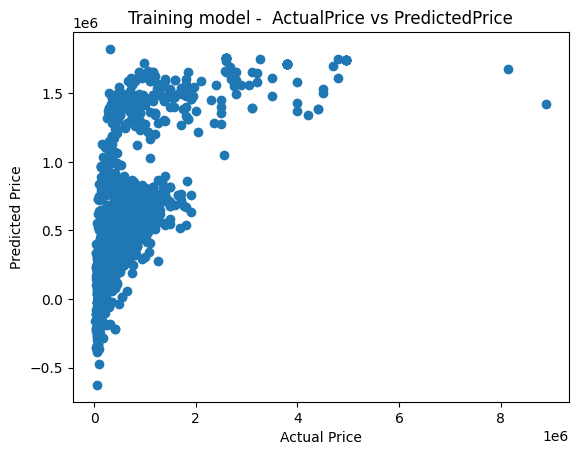

In [46]:
plt.scatter(Train_y, training_model_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Training model -  ActualPrice vs PredictedPrice')
plt.show()

In [47]:
testing_data_prediction = Linear_model.predict(Test_x)

In [66]:
error_socre_for_testing_dataset = metrics.r2_score(Test_y, testing_data_prediction)
print("R2- Score for testing dataset for Linear Model : ",error_socre_for_testing_dataset)

R2- Score for testing dataset for Linear Model :  0.47507883524929306


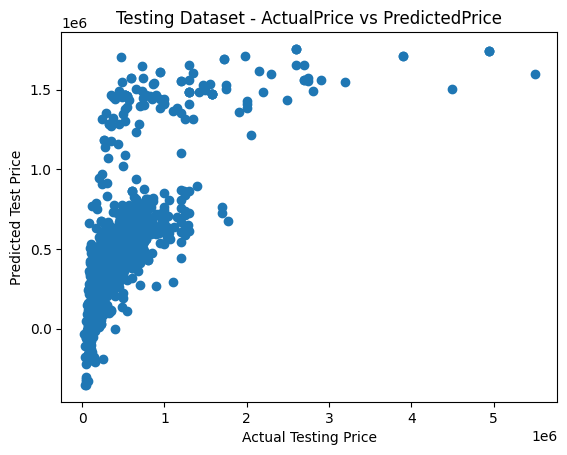

In [49]:
plt.scatter(Test_y, testing_data_prediction)
plt.xlabel('Actual Testing Price')
plt.ylabel('Predicted Test Price')
plt.title('Testing Dataset - ActualPrice vs PredictedPrice')
plt.show()

In [65]:
Accuracy_for_linear_model = metrics.mean_absolute_error(Test_y, testing_data_prediction)
print("Mean Absolute Error for Linear Model : ",Accuracy_for_linear_model)

Mean Absolute Error for Linear Model :  221779.89130533373


Lasso Regression Model

In [51]:
Lassor_model = Lasso()

In [52]:
Lassor_model.fit(Train_x, Train_y)

Lasso()

In [53]:
training_model_prediction_for_lasso = Lassor_model.predict(Train_x)

In [64]:
error_in_training_lassoModel = metrics.r2_score(Train_y, training_model_prediction_for_lasso)
print("R2-score for training dataset: ",error_in_training_lassoModel)

R2-score for training dataset:  0.4306785450789745


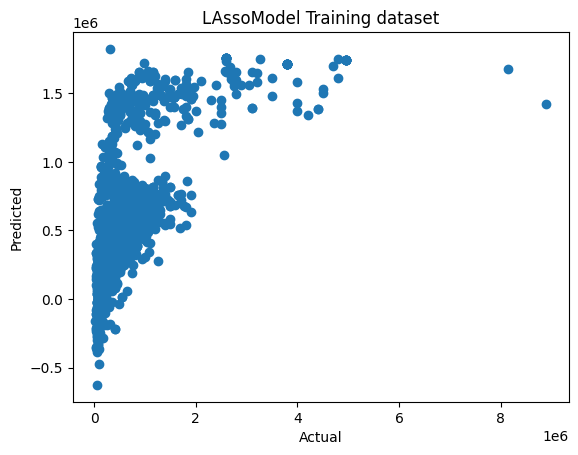

In [56]:
plt.scatter(Train_y, training_model_prediction_for_lasso)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LAssoModel Training dataset')
plt.show()

In [57]:
testing_model_prediction_for_lasso = Lassor_model.predict(Test_x)

In [63]:
error_in_testing_lasso_model = metrics.r2_score(Test_y, testing_model_prediction_for_lasso)
print("R2-Score for testing dataset : ",error_in_testing_lasso_model)

R2-Score for testing dataset :  0.4750795814805744


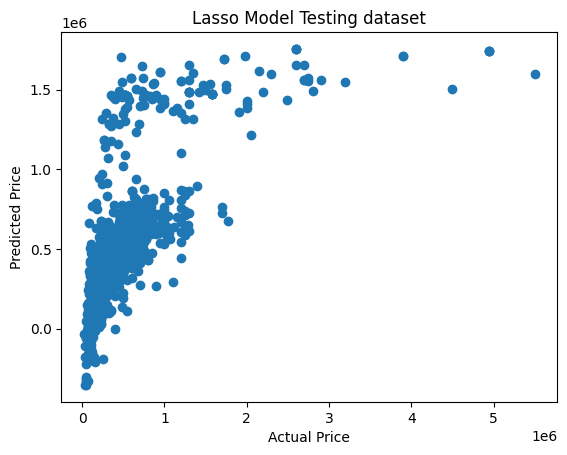

In [59]:
plt.scatter(Test_y, testing_model_prediction_for_lasso)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Model Testing dataset')
plt.show()

In [69]:
Accuracy_for_Lasso_model = metrics.mean_absolute_error(Test_y, testing_model_prediction_for_lasso)
print("Mean Absolute Error for Lasso model : ",Accuracy_for_Lasso_model)

Mean Absolute Error for Lasso model :  221779.28636662828
